# LightGBM
## 범주형

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path="/content/drive/MyDrive/빅데이터 팀플/dementia_analytics/"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 로딩 ### 

# train data loading
train_dataset_label = pd.read_csv(path + 'data_processing/dataset_01/training/label/train_dataset_label.csv')
train_dataset = pd.read_csv(path + 'data_processing/dataset_01/training/source/train_dataset_remove_nan.csv')

# train_output 을 DIAG_NM 하나의 col 만 가지는 data frame으로
train_output = pd.merge(train_dataset_label, train_dataset, on='ID')[['DIAG_NM']]

# train_input에서 'date' 와 'ID' column 제거
train_input = train_dataset.drop(train_dataset.columns[0], axis=1)
train_input = train_input.drop(train_input.columns[0], axis=1)

# test data loading
test_dataset_label = pd.read_csv(path +'data_processing/dataset_01/validation/label/val_dataset_label.csv')
test_dataset = pd.read_csv(path +'data_processing/dataset_01/validation/source/val_dataset_remove_nan.csv')

# test_output 을 DIAG_NM 하나의 col 만 가지는 data frame으로
test_output = pd.merge(test_dataset_label, test_dataset, on='ID')[['DIAG_NM']]

# test_input에서 'date' 와 'ID' column 제거 
test_input = test_dataset.drop(test_dataset.columns[0], axis=1)
test_input = test_input.drop(test_input.columns[0], axis=1)

### 레이블 인코딩 ### 

# 트리 기반 알고리즘에서는 숫자의 크기에 따른 중요도 차이가 없어 레이블 인코딩 OK
# 선형적 특징을 가지는 알고리즘들은 one hot encoding 통해 해결해야 함

from sklearn.preprocessing import LabelEncoder

# 라벨인코더 선언 및 Fitting
# CN : 0, Dem : 1, MCI : 2
items = ['CN', 'Dem', 'MCI']
encoder = LabelEncoder()
encoder.fit(items)

# train
train_output['DIAG_NM'] = encoder.transform(train_output['DIAG_NM'])
# display(encoder.classes_)
# display(encoder.inverse_transform(train_output['DIAG_NM']))

# test
test_output['DIAG_NM'] = encoder.transform(test_output['DIAG_NM'])

In [ ]:
### Light GBM ###
from lightgbm import LGBMClassifier

LGBM = LGBMClassifier()
evals = [(test_input, test_output)]
LGBM.fit(train_input, train_output, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
test_pred = LGBM.predict(test_input)
train_pred = LGBM.predict(train_input)
# pred_proba = LGBM.predict_proba(test_input)[:1]

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a fut

[1]	valid_0's multi_logloss: 0.768775
[2]	valid_0's multi_logloss: 0.770943
[3]	valid_0's multi_logloss: 0.772528
[4]	valid_0's multi_logloss: 0.774346
[5]	valid_0's multi_logloss: 0.776912
[6]	valid_0's multi_logloss: 0.777825
[7]	valid_0's multi_logloss: 0.779849
[8]	valid_0's multi_logloss: 0.783157
[9]	valid_0's multi_logloss: 0.787187
[10]	valid_0's multi_logloss: 0.789424
[11]	valid_0's multi_logloss: 0.791498
[12]	valid_0's multi_logloss: 0.791924
[13]	valid_0's multi_logloss: 0.795148
[14]	valid_0's multi_logloss: 0.797324
[15]	valid_0's multi_logloss: 0.79945
[16]	valid_0's multi_logloss: 0.801906
[17]	valid_0's multi_logloss: 0.804184
[18]	valid_0's multi_logloss: 0.805407
[19]	valid_0's multi_logloss: 0.808179
[20]	valid_0's multi_logloss: 0.808711
[21]	valid_0's multi_logloss: 0.811362
[22]	valid_0's multi_logloss: 0.812974
[23]	valid_0's multi_logloss: 0.8153
[24]	valid_0's multi_logloss: 0.815569
[25]	valid_0's multi_logloss: 0.8175
[26]	valid_0's multi_logloss: 0.81842
[

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(train_output, train_pred))
print(accuracy_score(test_output, test_pred))

0.5991665728122536
0.7924195680916704


<function matplotlib.pyplot.show(close=None, block=None)>

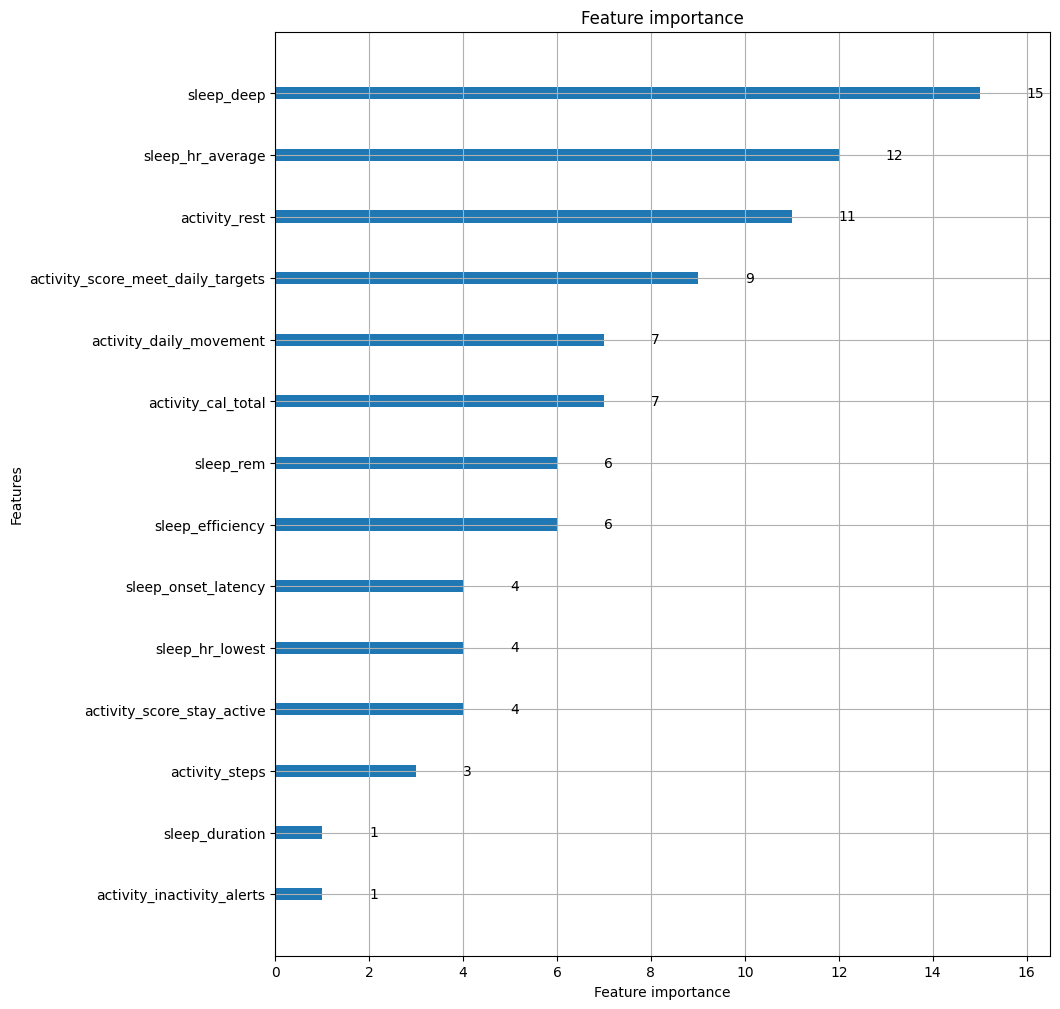

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(LGBM, ax=ax)
plt.show

In [ ]:
### Light GBM  + GridSearchCV ###
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

param_grid = {
    'boosting_type': ['gbdt'],
    'max_depth' : [1, 2, 3, 4, 5],
    'num_leaves' : [3, 4, 5, 6, 7],
    'learning_rate' : [0.03, 0.05, 1.0, 0.2, 0.3],
    'objective' : ['multiclass'],
    'metric' : ['multi_logloss'],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'subsample' : [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'n_estimators' : [5, 10, 15, 20],
    'num_class' : [1]
}

LGBM = LGBMClassifier()
grid_cv = GridSearchCV(LGBM, param_grid=param_grid, cv=3, scoring='f1_micro', n_jobs=4)
grid_cv.fit(train_input, train_output)

print(grid_cv.best_params_) 
print(grid_cv.best_score_)
train_preds = grid_cv.predict(train_input)
test_preds = grid_cv.predict(test_input)
train_f1 = f1_score(train_output, train_preds, average='micro')
test_f1 = f1_score(test_output, test_preds, average='micro')
# {'boosting_type': 'gbdt', 'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 3, 'metric': 'multi_logloss', 'n_estimators': 10, 'num_class': 1, 'num_leaves': 6, 'objective': 'multiclass', 'subsample': 0.5}
print("Train F1 Score:", train_f1) # Train F1 Score: 0.5991665728122536
print("Test F1 Score:", test_f1) # Test F1 Score: 0.7924195680916704

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


{'boosting_type': 'gbdt', 'colsample_bytree': 0.9, 'learning_rate': 0.03, 'max_depth': 3, 'metric': 'multi_logloss', 'n_estimators': 10, 'num_class': 1, 'num_leaves': 6, 'objective': 'multiclass', 'subsample': 0.5}
0.5992792259985568
Train F1 Score: 0.5991665728122536
Test F1 Score: 0.7924195680916704


In [ ]:
print(grid_cv.score(train_input, train_output)) # 0.5991665728122536
print(grid_cv.score(test_input, test_output)) # 0.7924195680916704

0.5991665728122536
0.7924195680916704
